# 以鸢尾花数据集为例，手写BP神经网络解决回归/分类问题

## hints
* 只需要三层神经网络（input, hidden, output）
* 代码中需要体现调参过程

## steps
1. 导入数据
2. 神经元计算
3. 激活函数
4. 激活函数求导函数
5. forward
6. loss bp
7. para update
8. main function : 超参数设置 + 神经网络的搭建与初始化 + 模型训练
9. 评价指标（accurary, precision, recall, F1-score）和验证
10. 可视化（训练损失、准确率，精度，召回率等图像）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris

In [2]:
# 导入数据
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# One-hot编码
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

In [4]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

$$σ(x)=\frac{1}{1+e^{−x}}$$
$$σ′(x)=x⋅(1−x)$$

In [5]:
# 激活函数及其导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
# 初始化参数
input_size = X_train.shape[1]
hidden_size = 32 # 隐藏层
output_size = y_train.shape[1]
learning_rate = 0.1 # 学习率
epochs = 1000

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

$$z_1 = X W_1 + b_1$$
$$a_1=σ(z_1)$$
$$z_2=a_1W_2+b_2$$
$$a_2=σ(z_2)$$

In [7]:
# 前向传播
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

## Loss使用的是均方误差
$$L=\frac{1}{2m}\sum_{i=1}^m(a_2^{(i)}-y^{(i)})^2$$
其中，$a_2$ 是输出层的激活值，$y$ 是真实标签，$m$ 是样本数量

## sigmoid求导
$$σ'(z)= σ(z)·(1-σ(z))$$

## 各个参数求导后的结果
$$
dz_2 = (a_2 - y) \cdot \sigma'(a_2)
$$

$$
dW_2 = \frac{1}{m} \cdot (a_1^T \cdot dz_2) \quad
$$

$$
db_2 = \frac{1}{m} \cdot \sum dz_2
$$

$$
dz_1 = (dz_2 \cdot W_2^T) \cdot \sigma'(a_1)
$$

$$
dW_1 = \frac{1}{m} \cdot (X^T \cdot dz_1)
$$

$$
db_1 = \frac{1}{m} \cdot \sum dz_1
$$

In [8]:
# 反向传播
def backward(X, y, z1, a1, z2, a2):
    global W1, b1, W2, b2
    # 元素数量
    m = X.shape[0]
    
    # 计算梯度
    dz2 = (a2 - y) * sigmoid_derivative(a2) # 这边这个这样写后面的几个导数都需要导入它，比较方便算
    dW2 = np.dot(a1.T, dz2) / m # np.dot(a1.T, dz2) 已经完成了矩阵乘法，这个操作会自动对所有样本进行累加，所以不加sum。
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    
    # 梯度下降
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [9]:
# 训练模型
losses = []
accuracies = []
precisions = []
recalls = []

for epoch in range(epochs):
    z1, a1, z2, a2 = forward(X_train)
    loss = 0.5 * np.mean((y_train - a2) ** 2)
    losses.append(loss)
    
    y_pred_train = np.argmax(a2, axis=1)
    y_true_train = np.argmax(y_train, axis=1)
    
    accuracy = accuracy_score(y_true_train, y_pred_train)
    precision = precision_score(y_true_train, y_pred_train, average='macro', zero_division=0)
    recall = recall_score(y_true_train, y_pred_train, average='macro')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    
    backward(X_train, y_train, z1, a1, z2, a2)
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Epoch 0, Loss: 0.265341893283206, Accuracy: 0.3416666666666667, Precision: 0.11388888888888889, Recall: 0.3333333333333333
Epoch 100, Loss: 0.12692742050871464, Accuracy: 0.3416666666666667, Precision: 0.11388888888888889, Recall: 0.3333333333333333
Epoch 200, Loss: 0.05408208357059989, Accuracy: 0.9583333333333334, Precision: 0.962121212121212, Recall: 0.959349593495935
Epoch 300, Loss: 0.044458594629618736, Accuracy: 0.95, Precision: 0.9522313010685104, Recall: 0.9508025849489264
Epoch 400, Loss: 0.04011236827639231, Accuracy: 0.9583333333333334, Precision: 0.962121212121212, Recall: 0.959349593495935
Epoch 500, Loss: 0.03680466260847581, Accuracy: 0.9583333333333334, Precision: 0.962121212121212, Recall: 0.959349593495935
Epoch 600, Loss: 0.03400960327242906, Accuracy: 0.9583333333333334, Precision: 0.962121212121212, Recall: 0.959349593495935
Epoch 700, Loss: 0.03156622307202456, Accuracy: 0.9583333333333334, Precision: 0.962121212121212, Recall: 0.959349593495935
Epoch 800, Loss: 

In [10]:
# 在测试集上评估模型
z1, a1, z2, a2 = forward(X_test)
y_pred_test = np.argmax(a2, axis=1)
y_true_test = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_true_test, y_pred_test)
test_precision = precision_score(y_true_test, y_pred_test, average='macro')
test_recall = recall_score(y_true_test, y_pred_test, average='macro')
test_f1 = f1_score(y_true_test, y_pred_test, average='macro')

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1-score: {test_f1}')

Test Accuracy: 0.9666666666666667
Test Precision: 0.9666666666666667
Test Recall: 0.9696969696969697
Test F1-score: 0.9665831244778612


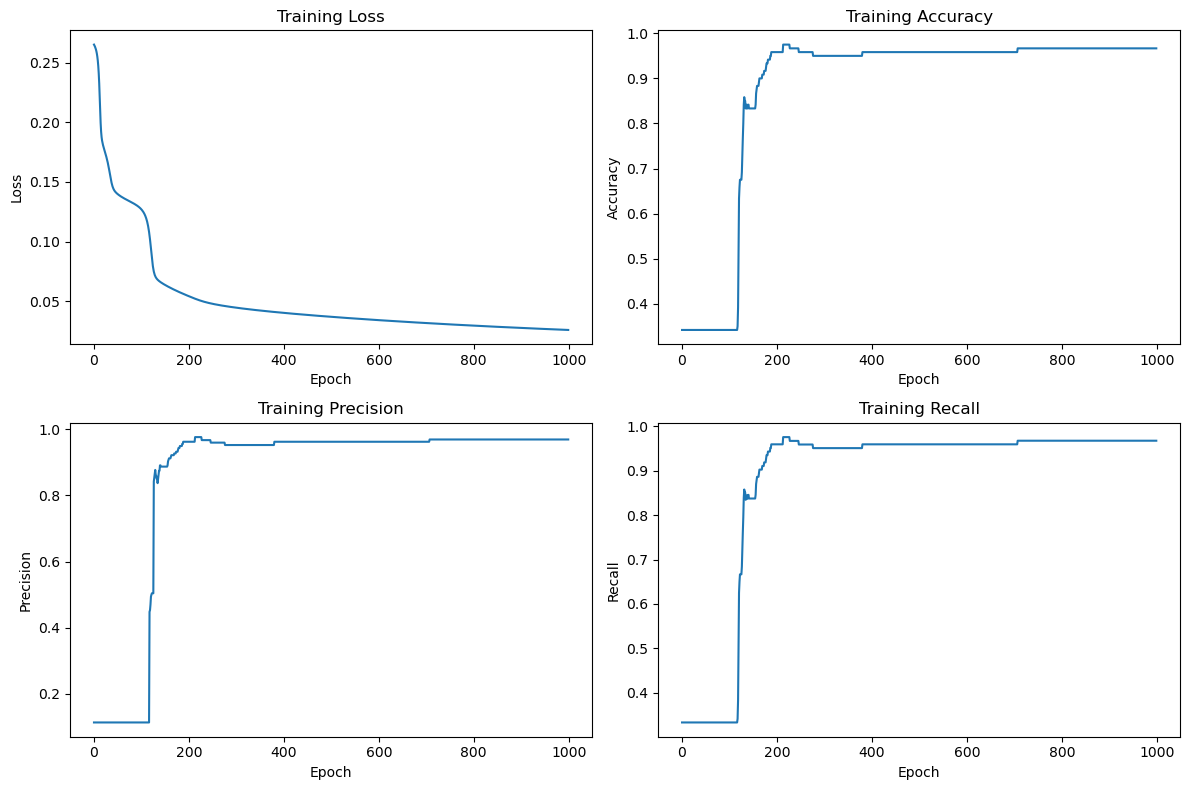

In [11]:
# 可视化
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 2, 2)
plt.plot(accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 3)
plt.plot(precisions)
plt.title('Training Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')

plt.subplot(2, 2, 4)
plt.plot(recalls)
plt.title('Training Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()


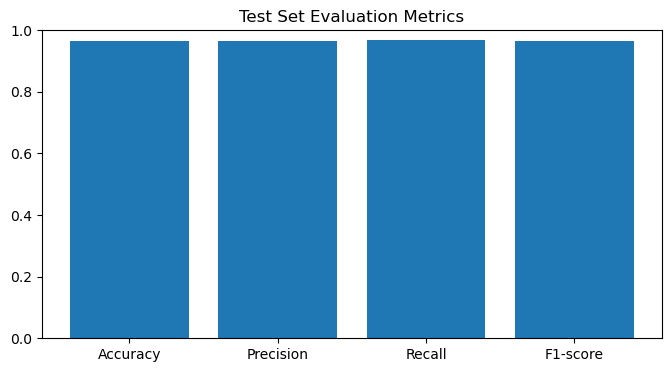

In [12]:
# 可视化测试集结果
plt.figure(figsize=(8, 4))
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], [test_accuracy, test_precision, test_recall, test_f1])
plt.title('Test Set Evaluation Metrics')
plt.ylim(0, 1)
plt.show()